In [53]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,8) #Preset chart sizes

## Data Cleaning :Import data, check for nulls and duplicates

In [5]:
data= pd.read_csv('movies.csv')
for col in data.columns:
    missing=np.mean(data[col].isnull())
    print('{} - {}%'.format(col,missing)) #show percent of nulls in each column

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
data=data.dropna()# There are only a few missing values so we drop the rows

In [45]:
data.dtypes

name                       object
rating                     object
genre                      object
year                        int64
released                   object
score                     float64
votes                       int64
director                   object
writer                     object
star                       object
country                    object
budget                      int64
gross                       int64
company                    object
runtime                     int64
release_date       datetime64[ns]
release_country            object
dtype: object

In [12]:
data['budget']=data['budget'].astype('int64')
data['votes']=data['votes'].astype('int64')
data['gross']=data['gross'].astype('int64')
data['runtime']=data['runtime'].astype('int64')

In [13]:
data.sort_values(by=['score'],inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,Who's Your Caddy?,PG-13,Comedy,2007,"July 27, 2007 (United States)",2.2,15000,Don Michael Paul,Don Michael Paul,Big Boi,United States,7000000,5713425,Ascendant Pictures,93
4412,From Justin to Kelly,PG,Comedy,2003,"June 20, 2003 (United States)",2.1,25000,Robert Iscove,Kim Fuller,Kelly Clarkson,United States,12000000,4928883,19 Entertainment,81
4342,House of the Dead,R,Action,2003,"October 10, 2003 (United States)",2.1,36000,Uwe Boll,Mark A. Altman,Jonathan Cherry,Germany,12000000,13818181,Boll Kino Beteiligungs GmbH & Co. KG,90
5306,Disaster Movie,PG-13,Comedy,2008,"August 29, 2008 (United States)",1.9,88000,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000,34816824,Lionsgate,87


In [17]:
# Seperate Date from Country in release
data[['release_date','release_country']]=data['released'].str.extract(r'(\w+ \d{1,2}, \d{4})\s+\((.*?)\)')

In [26]:
data['release_date']=pd.to_datetime(data['release_date'])

In [44]:
#check and drop duplicates
data[data.duplicated(subset=['name','year'],keep=False)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country


## Correlation

In [60]:
correlation_matrix = data.corr()# Pearson Correlation
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [59]:
data.corr(method='spearman') #Checking for possible ordinal data corelation to gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


<AxesSubplot:>

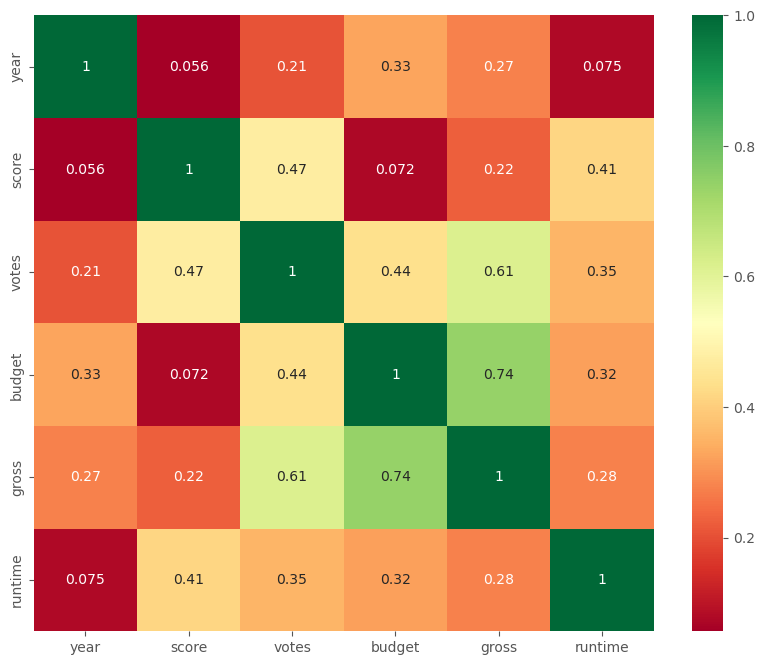

In [64]:
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

Text(0.5, 1.0, 'Votes to Gross earning')

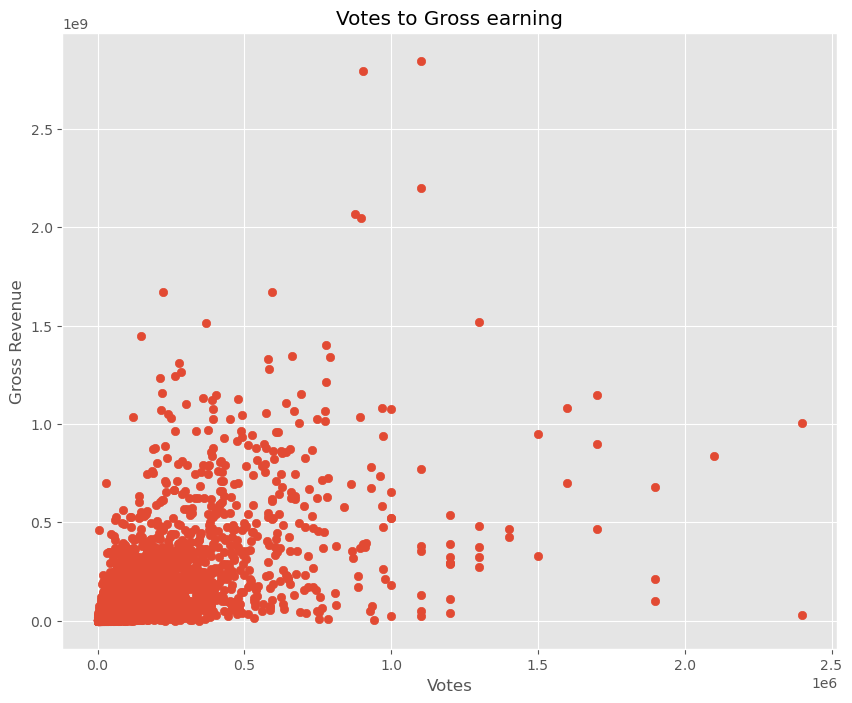

In [66]:
plt.scatter(x=data['votes'], y=data['gross'])
plt.xlabel('Votes')
plt.ylabel('Gross Revenue')
plt.title('Votes to Gross earning')

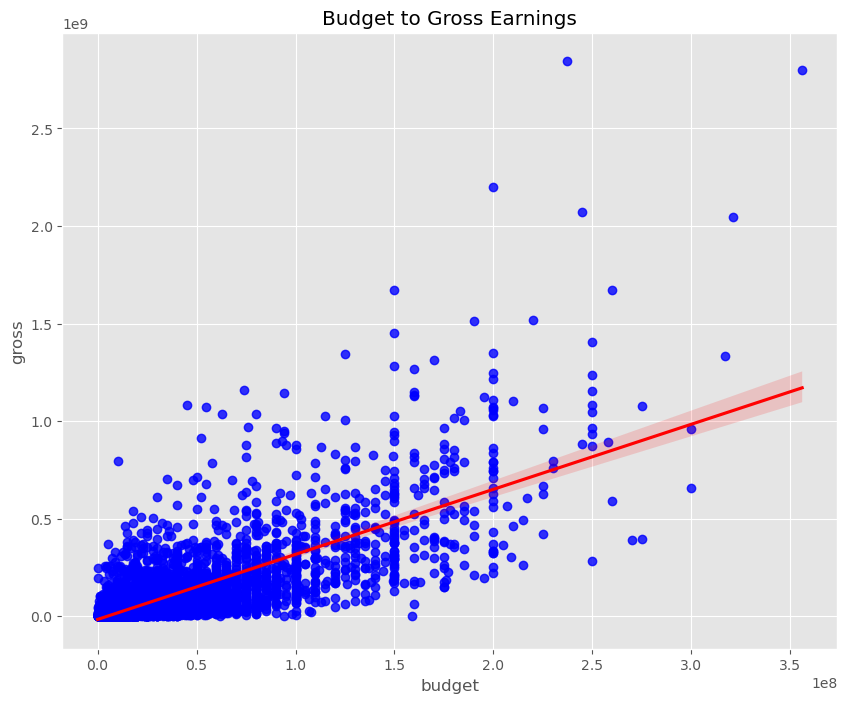

In [69]:
sns.regplot(x='budget', y='gross', data=data, scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.title('Budget to Gross Earnings')
plt.show()

In [70]:
df=data
for cols in df.columns:
    if(df[cols].dtype=='object'):
        df[cols]= df[cols].astype('category') # change strings to categories
        df[cols]=df[cols].cat.codes # gives numerization to categorical data
df        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980-06-13,47
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980-07-02,47
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980-06-20,47
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980-07-02,47
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980-07-25,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124,2020-01-17,47
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99,2020-02-14,47
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101,2020-01-17,47
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100,2020-02-21,47


<AxesSubplot:>

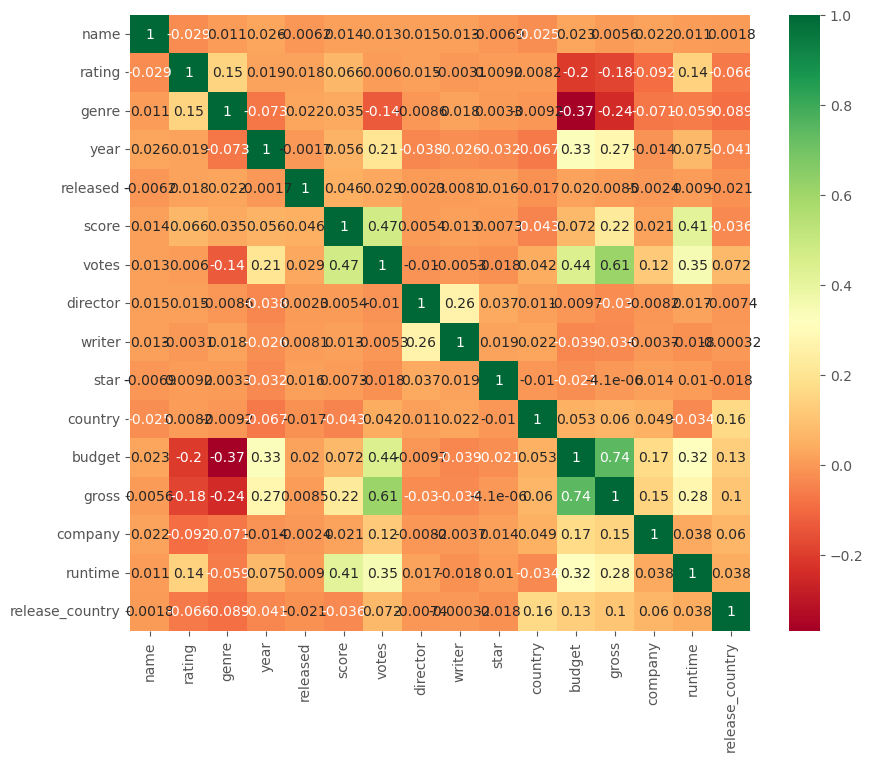

In [73]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')#Expand correlation to all table

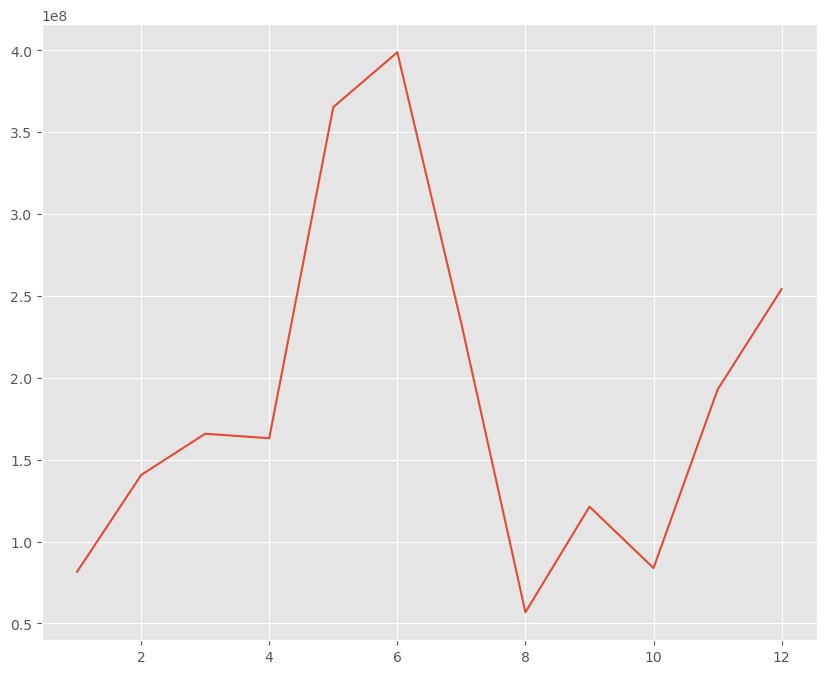

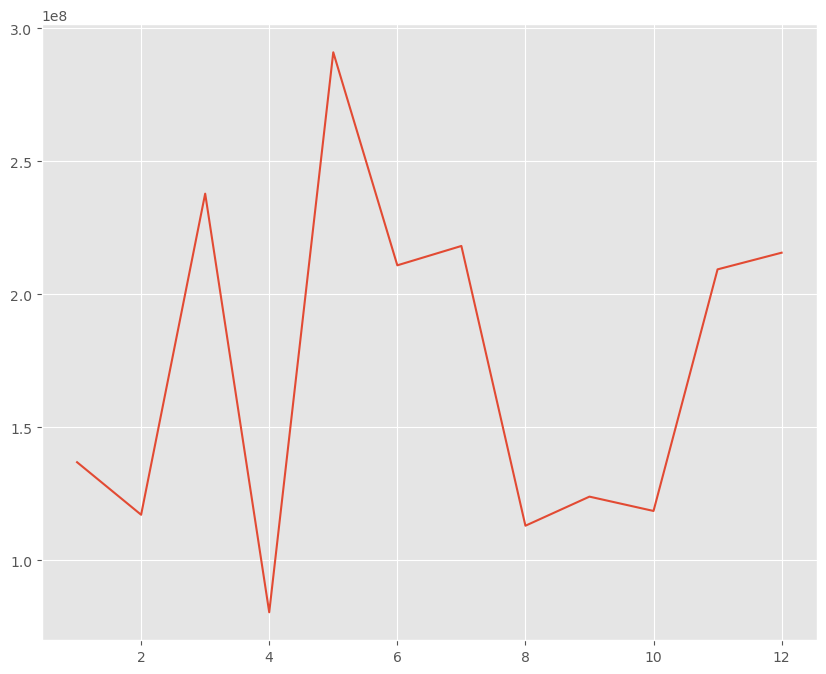

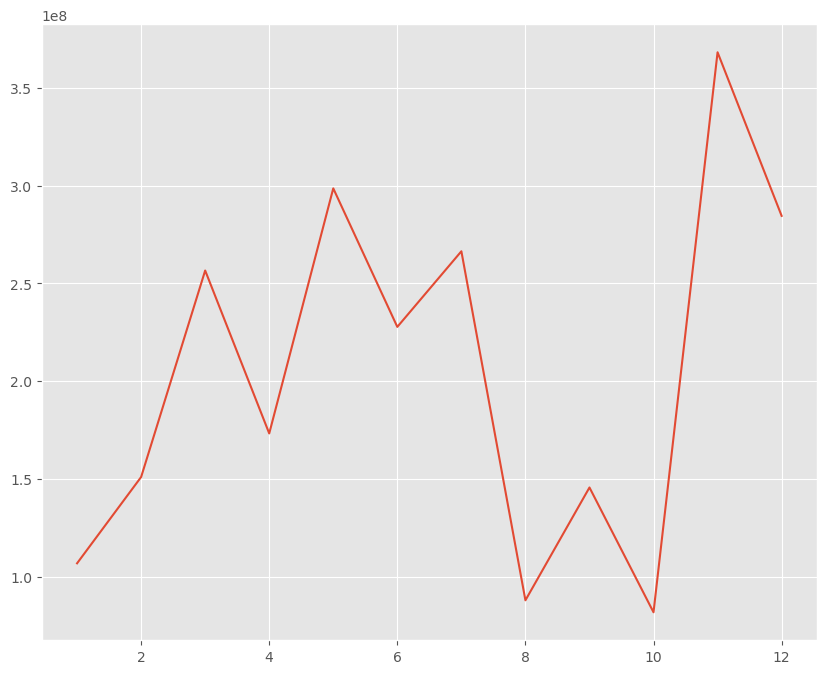

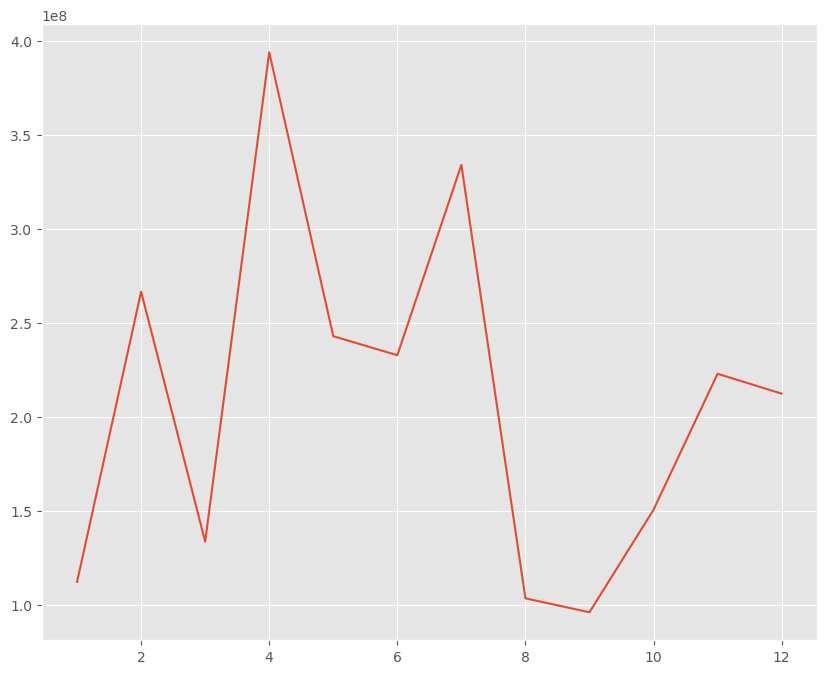

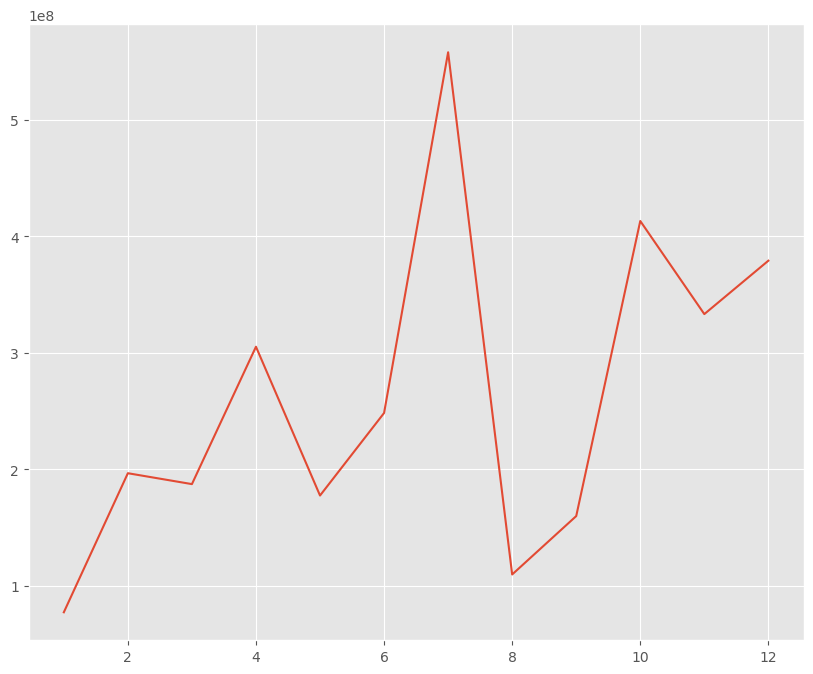

In [100]:
data['month']=data['release_date'].dt.month
data['year']=data['release_date'].dt.year
seasons= data.groupby(['year','month'])['gross'].mean().unstack()
rangey =range(2015,2020)
for yr in rangey:
    
    plt.plot(seasons.loc[yr])
    plt.show()